In [71]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

# Get a feel of the data (Using NY-Times 2019 Quotes)

Let's first load the data and convert it to tabular form

In [42]:
data = []
with open('quotes-2019-nytimes.json') as f:
    for line in f:
        data.append(json.loads(line))

In [43]:
def generate_data_model(data,n):
    """
    Converting json to tabular data
    Restrictions:
    -> Allowing up to 3 speakers and their correspond probabilities
    -> Not looking at urls, quids
    """
    # Create initial dataframe 
    df = pd.DataFrame()
    
    # For each line in json document retrieve info and append to df
    for i in range(n):
        current_data = dict(data[i])
        current_df = pd.DataFrame()
        current_df['quoteID'] = [current_data['quoteID']]
        current_df['quotation'] = [current_data['quotation']]
        current_df['date'] = [current_data['date']]
        current_df['numOccurrences'] = [current_data['numOccurrences']]
        current_df['phase'] = [current_data['phase']]
        
        # Select only the 3 most probable speakers of the quote
        for j in range(3):
            if j < len(current_data['probas']):
                current_df[f"{'speaker'+str(j+1)}"] = [current_data['probas'][j][0]]
                current_df[f"{'probas'+str(j+1)}"] = [current_data['probas'][j][1]]
            else:
                current_df[f"{'speaker'+str(j+1)}"] = [np.nan]
                current_df[f"{'probas'+str(j+1)}"] = [0]
        df = df.append(current_df)
    
    
    # Convert numeric columns to int (stored as object prior)
    df['numOccurrences'] = pd.to_numeric(df['numOccurrences'])
    df['count'] = 1
    
    return df

We will load a subset of the data. Loading 50.000 quotes:

In [44]:
df = generate_data_model(data,50000)

## Analysis

## 1. Who has most quotes attributed to them?

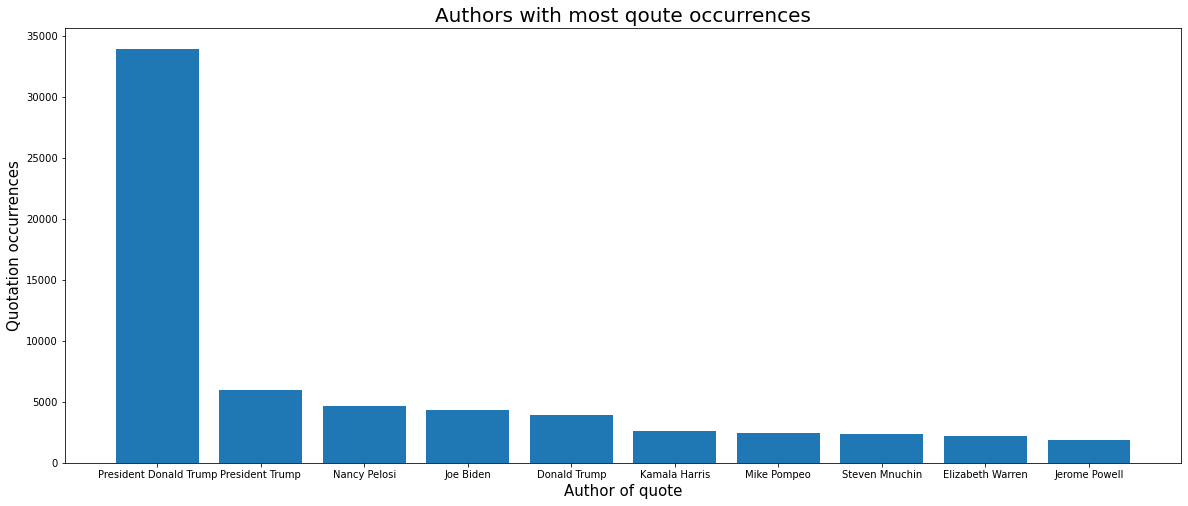

In [152]:
top_speakers = df.loc[df.speaker1 != 'None'].groupby(by=['speaker1']).sum().sort_values(by='numOccurrences',ascending=False).reset_index()
fig,ax = plt.subplots(figsize=(20,8))
ax.bar(top_speakers.speaker1[:10],top_speakers.numOccurrences[:10])
ax.set_xlabel("Author of quote",size=15)
ax.set_ylabel("Quotation occurrences",size=15)
#plt.xticks(top_speakers.speaker1[:10],rotation=90)
ax.set_title("Authors with most qoute occurrences",size=20)
plt.show()

We see that most of the quotes are from politicians - probably because of the profile of NY-times

## 2. How does the daily number of quotes vary throughout the year?

In [65]:
df['date_clean'] = df.apply(lambda x: x['date'][:10],axis=1)

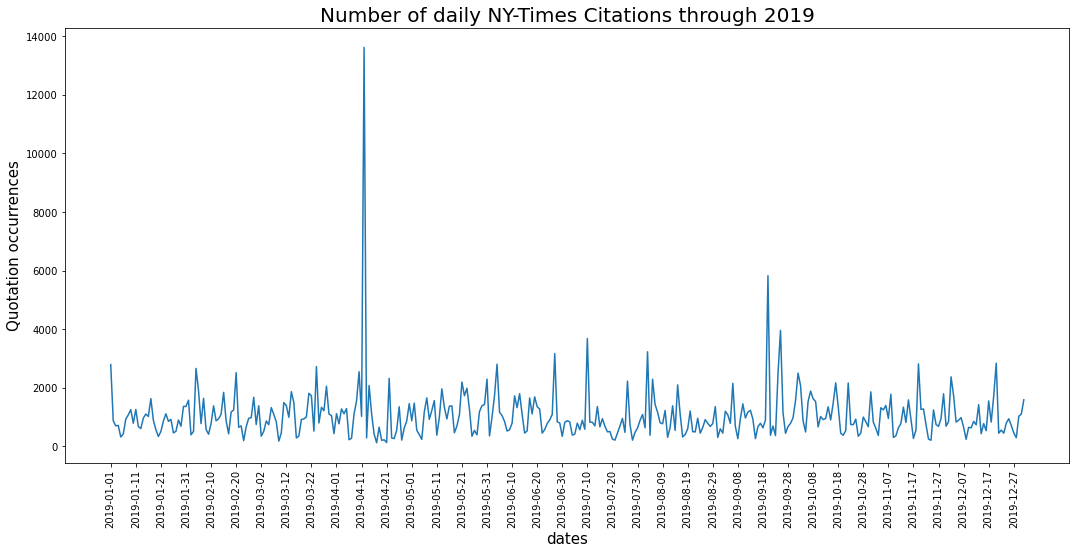

In [118]:
time = df.groupby(['date_clean']).sum().index
quote_num = df.groupby(['date_clean']).sum()['numOccurrences']
fig,ax = plt.subplots(figsize=(18,8))
ax.plot(time,quote_num)
ax.set_xlabel("dates",size=15)
plt.xticks(time[::10],rotation=90)
ax.set_ylabel("Quotation occurrences",size=15)
ax.set_title("Number of daily NY-Times Citations through 2019",size=20)
plt.show()


Comment: We see a big spike of quotes originating from April 

## 3. How does the distribution of quote occurences look?

Text(0.5, 1.0, 'Distribution of quote occurrences (Occurrences capped at 60)')

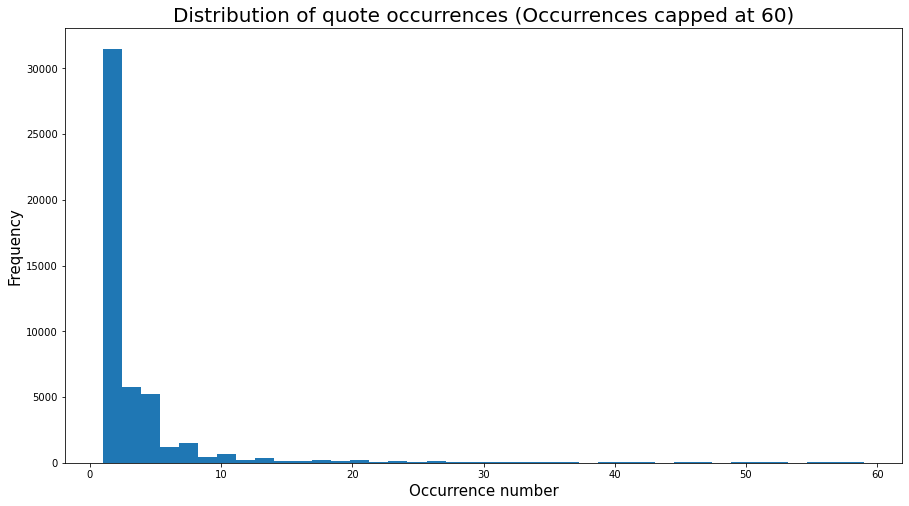

In [155]:
fig,ax = plt.subplots(figsize=(15,8))
ax.hist(df.numOccurrences[df.numOccurrences < 60],bins=40);
ax.set_xlabel("Occurrence number",size=15)
ax.set_ylabel("Frequency",size=15)
ax.set_title("Distribution of quote occurrences (Occurrences capped at 60)",size=20)